In [13]:
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

import torch
from torchvision.utils import save_image

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
sns.set_style('darkgrid')

In [ ]:
cd ../src/KL-BigGAN

In [4]:
from clf_models import ResNet18, BasicBlock

# Samples

In [7]:
CLF_PATH = '../../results/attr_clf/model_best.pth.tar'  # path to trained attribute classifier

# can we load the classifier directly here?
clf_ckpt = torch.load(CLF_PATH, map_location=torch.device('cpu'))
attr_clf = ResNet18(block=BasicBlock, layers=[2, 2, 2, 2], 
    num_classes=2, grayscale=False) 
clf_state_dict = clf_ckpt['state_dict']
attr_clf.load_state_dict(clf_state_dict)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
attr_clf = attr_clf.to(device)

In [32]:
def reorder_samples(samp, title, order=True):
    samp = samp.to(device)
    logits, probas = attr_clf(samp)
    _, preds = torch.max(probas, 1)
    lbs = np.ravel([True if x else False for x in preds]).astype(float)
    
    if order:
        idx = torch.argsort(preds)
        samp = samp[idx]
        preds = preds[idx]
        lbs = torch.from_numpy(lbs)[idx]
    
    save_image(samp, '../../figures/{}.png'.format(title), nrow=20)
    display(Image('../../figures/{}.png'.format(title)))
    return samp, preds, lbs

--------------

# View Samples

### bias=90-10: perc=1.0

baseline

(10000, 3, 64, 64)


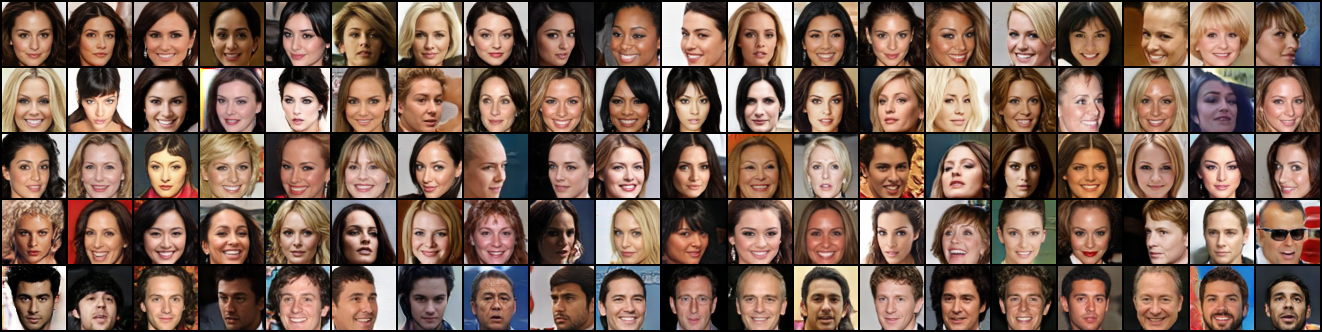

proportion of males: 0.23 to females: 0.77


In [36]:
samples = np.load('/atlas/u/kechoi/fair_generative_modeling/src/KL-BigGAN/samples/icml_90_10_small1.0_baseline/fid_samples_0.npz')['x']
print(samples.shape)

idx = np.random.choice(10000, 100)
samples = torch.from_numpy(samples[idx])
samples = samples.float()/ 255.

# figure
samp, preds, lbs = reorder_samples(samples, 'baseline_sample')
print('proportion of males: {} to females: {}'.format(np.round(float(preds.sum())/100, 3), np.round(1 - float(preds.sum())/100, 3)))


conditional

(10000, 3, 64, 64)


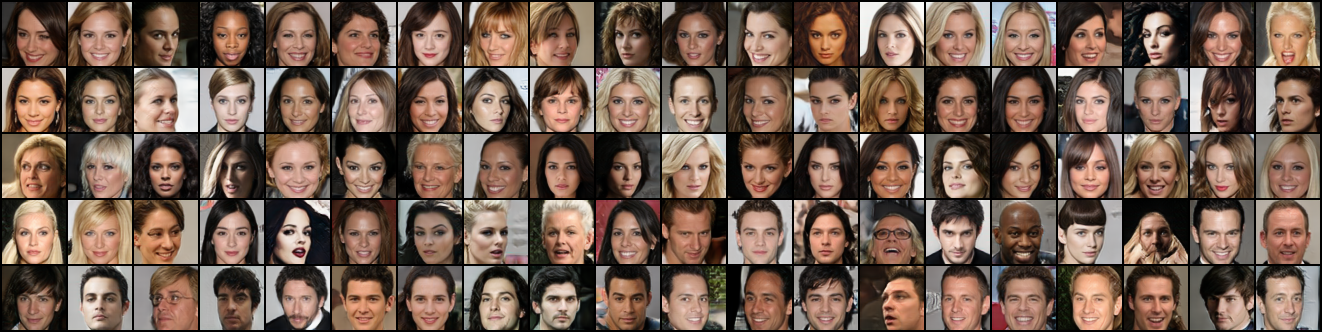

proportion of males: 0.3 to females: 0.7


In [39]:
samples = np.load('/atlas/u/kechoi/fair_generative_modeling/src/KL-BigGAN/samples/icml_90_10_small1.0_conditional/fid_samples_0.npz')['x']
print(samples.shape)

idx = np.random.choice(10000, 100)
samples = torch.from_numpy(samples[idx])
samples = samples.float()/ 255.

# figure
samp, preds, lbs = reorder_samples(samples, 'conditional_sample')
print('proportion of males: {} to females: {}'.format(np.round(float(preds.sum())/100, 3), np.round(1 - float(preds.sum())/100, 3)))


impweight

(10000, 3, 64, 64)


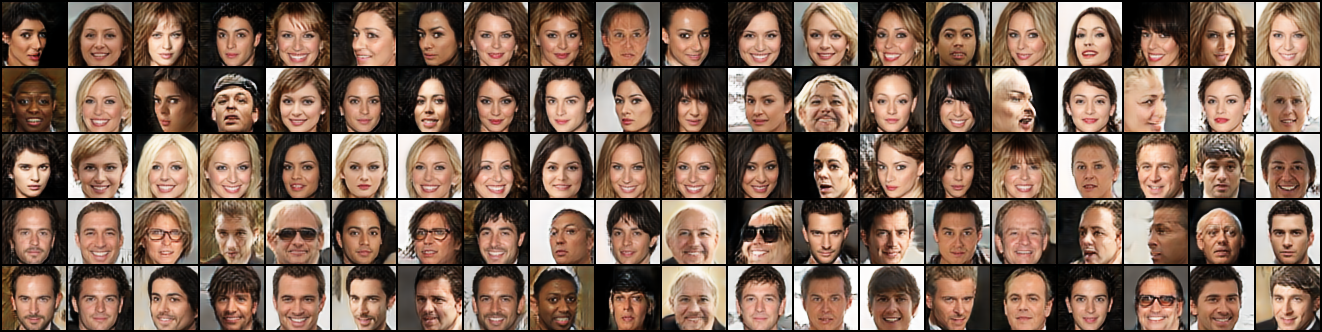

proportion of males: 0.43 to females: 0.57


In [43]:
# impweight
samples = np.load('/atlas/u/kechoi/fair_generative_modeling/src/KL-BigGAN/samples/neurips_90_10_small0.1_1.0_bs16/fid_samples_0.npz')['x']
print(samples.shape)

idx = np.random.choice(10000, 100)
samples = torch.from_numpy(samples[idx])
samples = samples.float()/ 255.

# figure
samp, preds, lbs = reorder_samples(samples, 'impweight_sample')
print('proportion of males: {} to females: {}'.format(np.round(float(preds.sum())/100, 3), np.round(1 - float(preds.sum())/100, 3)))
